In [3]:
from torchvision import datasets
dataset = datasets.ImageFolder('dataset/train')
print(dataset.classes)

['Avocado', 'Brocolli', 'Cabbage', 'Cantaloupe', 'Capsicum', 'Cauliflower', 'Cucumber', 'Dates', 'Fig', 'Ginger', 'Lemon', 'Lychee', 'Peach', 'Pear', 'Potato', 'Tomato', 'apples', 'banana', 'blackberry', 'orange']


Predicted Item: Capsicum
Nutritional Information per 100g:
  Calories: 20
  Fiber: 1.7
  Vitamin C: 80.4


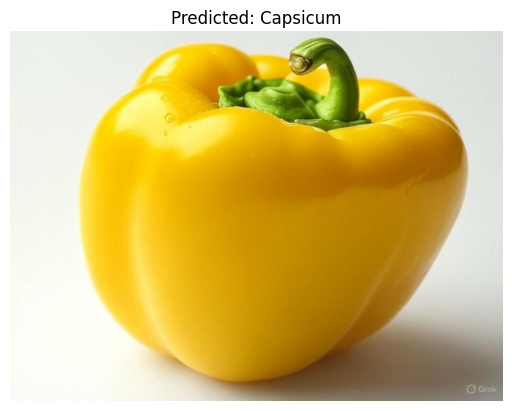

In [2]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the same model architecture used during training
class CNNModel(torch.nn.Module):
    def __init__(self, num_classes=20):
        super(CNNModel, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32, 64, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(64, 128, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Flatten(),
            torch.nn.Linear(128 * 16 * 16, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Load the trained model
model = CNNModel()
model.load_state_dict(torch.load("fruit_veg_model.pth", map_location=torch.device('cpu')))
model.eval()

# Define class labels
class_labels = [
    'Avocado', 'Brocolli', 'Cabbage', 'Cantaloupe', 'Capsicum',
    'Cauliflower', 'Cucumber', 'Dates', 'Fig', 'Ginger',
    'Lemon', 'Lychee', 'Peach', 'Pear', 'Potato',
    'Tomato', 'apples', 'banana', 'blackberry', 'orange'
]


# Nutritional information per 100g for each item
nutrition_info = {
    'Avocado': {'Calories': 160, 'Fiber': 6.7, 'Vitamin C': 10},
    'Brocolli': {'Calories': 34, 'Fiber': 2.6, 'Vitamin C': 89.2},
    'Cabbage': {'Calories': 25, 'Fiber': 2.5, 'Vitamin C': 36.6},
    'Cantaloupe': {'Calories': 34, 'Fiber': 0.9, 'Vitamin C': 36.7},
    'Capsicum': {'Calories': 20, 'Fiber': 1.7, 'Vitamin C': 80.4},
    'Cauliflower': {'Calories': 25, 'Fiber': 2.0, 'Vitamin C': 48.2},
    'Cucumber': {'Calories': 16, 'Fiber': 0.5, 'Vitamin C': 2.8},
    'Dates': {'Calories': 282, 'Fiber': 8.0, 'Vitamin C': 0.4},
    'Fig': {'Calories': 74, 'Fiber': 2.9, 'Vitamin C': 2.0},
    'Ginger': {'Calories': 80, 'Fiber': 2.0, 'Vitamin C': 5.0},
    'Lemon': {'Calories': 29, 'Fiber': 2.8, 'Vitamin C': 53.0},
    'Lychee': {'Calories': 66, 'Fiber': 1.3, 'Vitamin C': 71.5},
    'Peach': {'Calories': 39, 'Fiber': 1.5, 'Vitamin C': 6.6},
    'Pear': {'Calories': 57, 'Fiber': 3.1, 'Vitamin C': 4.3},
    'Potato': {'Calories': 77, 'Fiber': 2.2, 'Vitamin C': 19.7},
    'Tomato': {'Calories': 18, 'Fiber': 1.2, 'Vitamin C': 13.7},
    'apples': {'Calories': 52, 'Fiber': 2.4, 'Vitamin C': 4.6},
    'banana': {'Calories': 89, 'Fiber': 2.6, 'Vitamin C': 8.7},
    'blackberry': {'Calories': 43, 'Fiber': 5.3, 'Vitamin C': 21.0},
    'orange': {'Calories': 47, 'Fiber': 2.4, 'Vitamin C': 53.2}
}


# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load and preprocess the image
image_path = 'D:/image.jpg'  
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Predict
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    predicted_class = class_labels[predicted.item()]

# Retrieve nutritional information
nutrition = nutrition_info.get(predicted_class, {})

# Display results
print(f"Predicted Item: {predicted_class}")
print("Nutritional Information per 100g:")
for nutrient, value in nutrition.items():
    print(f"  {nutrient}: {value}")

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


Predicted Item: blackberry
Nutritional Information per 100g:
  Calories: 43
  Fiber: 5.3
  Vitamin C: 21.0


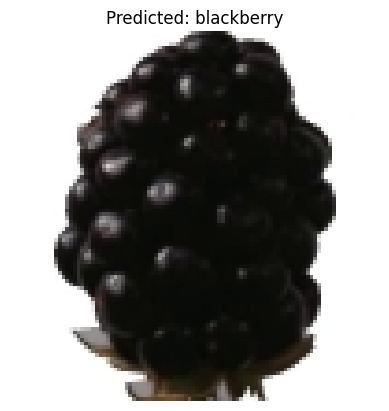

In [6]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the same model architecture used during training
class CNNModel(torch.nn.Module):
    def __init__(self, num_classes=20):
        super(CNNModel, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32, 64, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(64, 128, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Flatten(),
            torch.nn.Linear(128 * 16 * 16, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Load the trained model
model = CNNModel()
model.load_state_dict(torch.load("fruit_veg_model.pth", map_location=torch.device('cpu')))
model.eval()

# Define class labels
class_labels = [
    'Avocado', 'Brocolli', 'Cabbage', 'Cantaloupe', 'Capsicum',
    'Cauliflower', 'Cucumber', 'Dates', 'Fig', 'Ginger',
    'Lemon', 'Lychee', 'Peach', 'Pear', 'Potato',
    'Tomato', 'apples', 'banana', 'blackberry', 'orange'
]


# Nutritional information per 100g for each item
nutrition_info = {
    'Avocado': {'Calories': 160, 'Fiber': 6.7, 'Vitamin C': 10},
    'Brocolli': {'Calories': 34, 'Fiber': 2.6, 'Vitamin C': 89.2},
    'Cabbage': {'Calories': 25, 'Fiber': 2.5, 'Vitamin C': 36.6},
    'Cantaloupe': {'Calories': 34, 'Fiber': 0.9, 'Vitamin C': 36.7},
    'Capsicum': {'Calories': 20, 'Fiber': 1.7, 'Vitamin C': 80.4},
    'Cauliflower': {'Calories': 25, 'Fiber': 2.0, 'Vitamin C': 48.2},
    'Cucumber': {'Calories': 16, 'Fiber': 0.5, 'Vitamin C': 2.8},
    'Dates': {'Calories': 282, 'Fiber': 8.0, 'Vitamin C': 0.4},
    'Fig': {'Calories': 74, 'Fiber': 2.9, 'Vitamin C': 2.0},
    'Ginger': {'Calories': 80, 'Fiber': 2.0, 'Vitamin C': 5.0},
    'Lemon': {'Calories': 29, 'Fiber': 2.8, 'Vitamin C': 53.0},
    'Lychee': {'Calories': 66, 'Fiber': 1.3, 'Vitamin C': 71.5},
    'Peach': {'Calories': 39, 'Fiber': 1.5, 'Vitamin C': 6.6},
    'Pear': {'Calories': 57, 'Fiber': 3.1, 'Vitamin C': 4.3},
    'Potato': {'Calories': 77, 'Fiber': 2.2, 'Vitamin C': 19.7},
    'Tomato': {'Calories': 18, 'Fiber': 1.2, 'Vitamin C': 13.7},
    'apples': {'Calories': 52, 'Fiber': 2.4, 'Vitamin C': 4.6},
    'banana': {'Calories': 89, 'Fiber': 2.6, 'Vitamin C': 8.7},
    'blackberry': {'Calories': 43, 'Fiber': 5.3, 'Vitamin C': 21.0},
    'orange': {'Calories': 47, 'Fiber': 2.4, 'Vitamin C': 53.2}
}


# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load and preprocess the image
image_path = 'D:/image2.jpg'  
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Predict
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    predicted_class = class_labels[predicted.item()]

# Retrieve nutritional information
nutrition = nutrition_info.get(predicted_class, {})

# Display results
print(f"Predicted Item: {predicted_class}")
print("Nutritional Information per 100g:")
for nutrient, value in nutrition.items():
    print(f"  {nutrient}: {value}")

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
